In [1]:
from skimage import morphology #erosion Ref:https://scikit-image.org/docs/dev/auto_examples/applications/plot_morphology.html

In [2]:
from skimage import io, color

In [3]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, disk

In [4]:
from skimage.util import img_as_ubyte

In [5]:
img=io.imread('astronaut.png')

In [6]:
gray = color.rgb2gray(img)

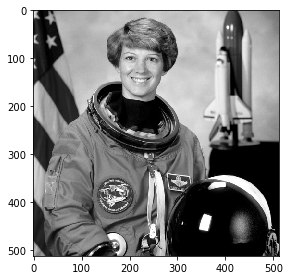

In [7]:
io.imshow(gray)

In [8]:
img1 = img_as_ubyte(gray)

In [9]:
eroded=erosion(img1, disk(3))

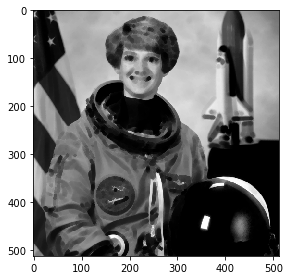

In [10]:
io.imshow(eroded)

In [11]:
dilated = dilation(img1, disk(7))

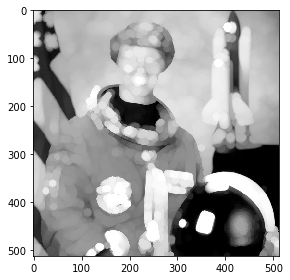

In [12]:
io.imshow(dilated)

In [13]:
import matplotlib.pyplot as plt # more detail example

In [14]:
from skimage import data

In [15]:
from skimage.util import img_as_ubyte

In [16]:
from skimage import io

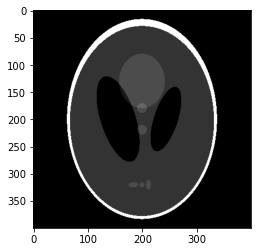

In [17]:
orig_phantom = img_as_ubyte(data.shepp_logan_phantom())
fig, ax = plt.subplots()
ax.imshow(orig_phantom, cmap=plt.cm.gray)

In [18]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')   #define a convenience function for plotting comparisons

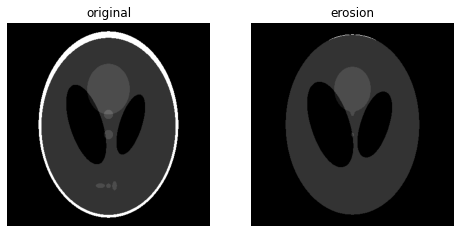

In [19]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

selem = disk(6)
eroded = erosion(orig_phantom, selem)
plot_comparison(orig_phantom, eroded, 'erosion') # Erosion

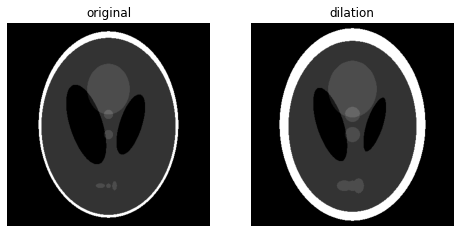

In [20]:
dilated = dilation(orig_phantom, selem)
plot_comparison(orig_phantom, dilated, 'dilation') #Dilation

In [21]:
img= data.shepp_logan_phantom()

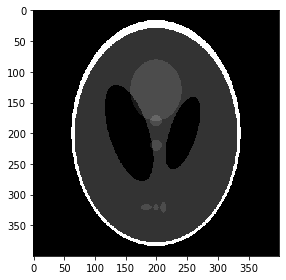

In [22]:
io.imshow(img)

In [23]:
from skimage import io,segmentation,color #unsuperised segmentation

In [24]:
from skimage.io import imread

In [25]:
from matplotlib import pyplot as plt

In [26]:
img=imread("animal.jpg")

In [27]:
img_segments = segmentation.slic(img, compactness=10, n_segments=20)

<ipython-input-27-fda4335ee921>:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  img_segments = segmentation.slic(img, compactness=10, n_segments=20)


In [28]:
superpixels = color.label2rgb(img_segments, img, kind='avg')

<ipython-input-28-7fb950c10117>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  superpixels = color.label2rgb(img_segments, img, kind='avg')


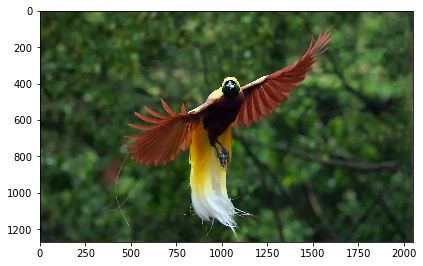

In [29]:
io.imshow(img)

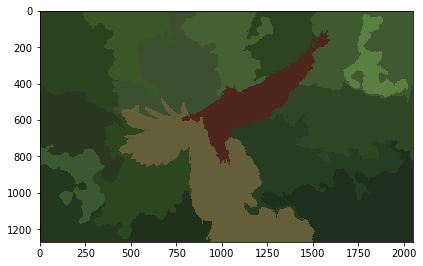

In [30]:
io.imshow(superpixels)

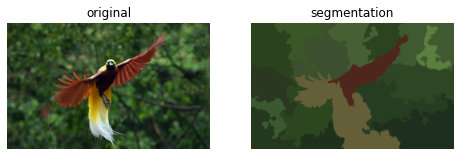

In [31]:
plot_comparison(img, superpixels, 'segmentation')

In [32]:
from skimage import measure,io,color # contour detection 

In [33]:
from skimage.io import imread

In [34]:
from skimage.filters import sobel

In [35]:
import matplotlib.pyplot as plt 

In [36]:
img = io.imread('contour.png') #Read an image

In [37]:
from skimage.color import rgb2gray

In [38]:
img_gray = rgb2gray(img) #Convert the image to grayscale

In [39]:
img_edges = sobel(img_gray) #Find edges in the image

In [40]:
contours = measure.find_contours(img_edges, 0.1)

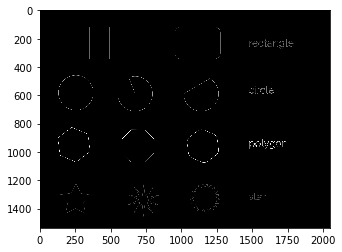

In [41]:
fig, ax = plt.subplots()
ax.imshow(img_edges, interpolation='nearest', cmap=plt.cm.gray)

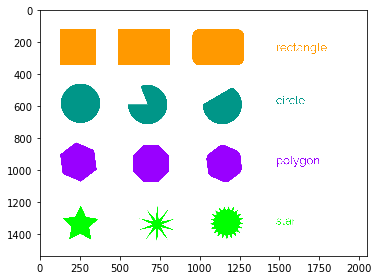

In [42]:
io.imshow('contour.png')

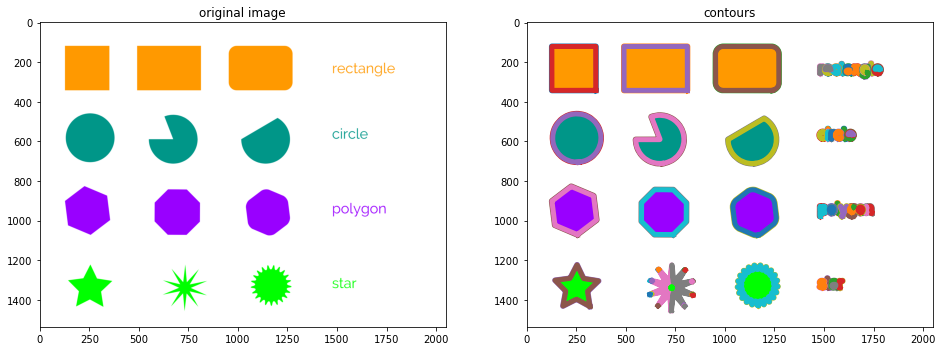

In [43]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(16,16)) # set the figs to be shown, here are two figs. at the same row
ax0.imshow(img,plt.cm.gray) # plot original fig at 1,1
ax1.imshow(img,plt.cm.gray) # plot original fig at 1,2
ax0.set_title('original image') # set the title of 1,1
ax1.set_title('contours') # set the title of 1,2
for n, contour in enumerate(contours): #plot the contours
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=5)
